# Redes Neuronales
Pedro Antonio Mendoza Rivera 2008344 N1

Se importan las librerias

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Se prepara el conjunto de datos

In [4]:
keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Se hace una verificación de datos

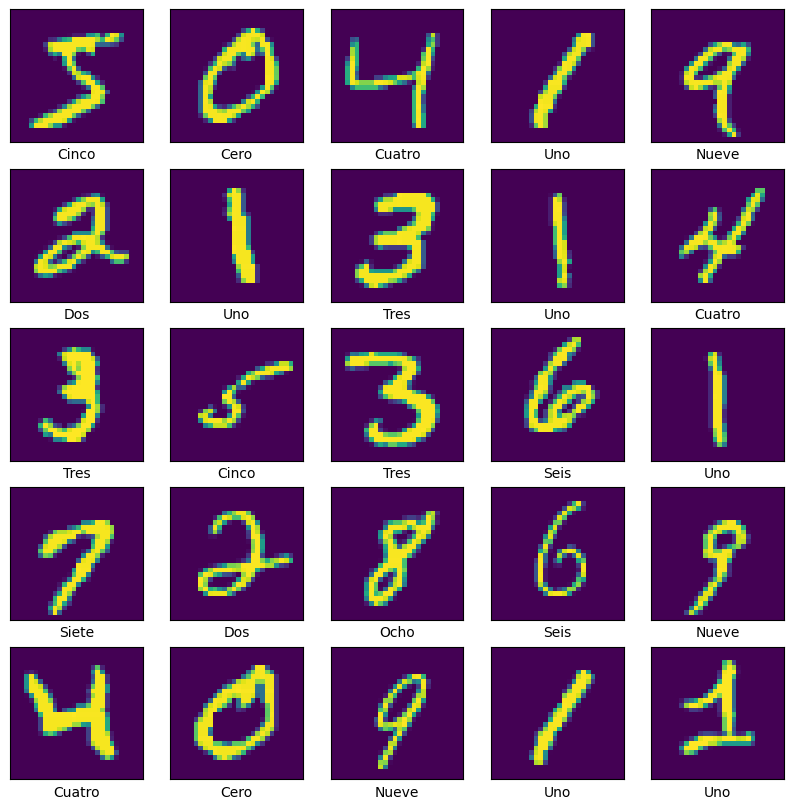

In [6]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Creamos la base convolucional con Conv2D y MaxPooling2D

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

Se agregan las capas densas en la parte superior

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Compilamos y entrenamos nuestor modelo de red neuronal convolucional

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 51s 26ms/step - loss: 0.1437 - accuracy: 0.9562 - val_loss: 0.0461 - val_accuracy: 0.9848
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0374 - val_accuracy: 0.9881
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0322 - accuracy: 0.9899 - val_loss: 0.0316 - val_accuracy: 0.9910
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0250 - accuracy: 0.9918 - val_loss: 0.0273 - val_accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0405 - val_accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0287 - val_accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0289 -

Se evalua el modelo

313/313 - 2s - loss: 0.0385 - accuracy: 0.9913 - 2s/epoch - 6ms/step


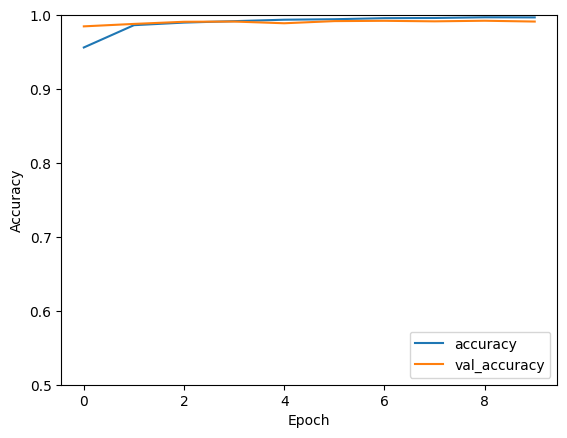

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
print(test_acc)

0.9912999868392944


In [14]:
predicciones = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


Predicción 1

In [15]:
predicciones[20]

array([ -7.2906885,  -6.9625516,  -8.052995 ,  -3.943023 ,   4.780953 ,
        -3.0274885, -12.693221 ,   4.4959593,  -1.9187508,  13.797185 ],
      dtype=float32)

In [16]:
np.argmax(predicciones[20])

9

In [18]:
#Valor real
test_labels[20]

9

Predicción 2

In [19]:
predicciones[3]

array([ 18.319407 , -11.848988 ,  -6.5003185,  -3.2796814,  -5.6314836,
        -1.6006342,  -1.4285392,  -1.0788444,  -3.2952664,   1.7557063],
      dtype=float32)

In [20]:
np.argmax(predicciones[3])

0

In [21]:
#Valor real
test_labels[3]

0

Predicción 3

In [22]:
predicciones[114]

array([-20.738987  ,  -4.7249365 ,  -0.5155548 ,  -2.0562134 ,
         4.079007  , -13.746627  , -13.44081   ,  20.30522   ,
        -9.63534   ,  -0.27128348], dtype=float32)

In [23]:
np.argmax(predicciones[114])

7

In [24]:
#Valor real
test_labels[114]

7

Predicción 4

In [25]:
predicciones[160]

array([-11.831819  ,   2.0998883 ,   0.44513735, -11.655902  ,
         8.980921  ,  -4.452949  ,   0.25796485, -10.7330475 ,
         2.757316  ,  -5.834225  ], dtype=float32)

In [26]:
np.argmax(predicciones[160])

4

In [27]:
#Valor real
test_labels[160]

4

Predicción 5

In [28]:
predicciones[300]

array([-15.847779 ,   2.9648085,   1.8483831,  -8.596729 ,  13.719138 ,
       -11.229302 ,  -5.00769  ,   4.3510966,  -5.767273 ,  -3.7440412],
      dtype=float32)

In [29]:
np.argmax(predicciones[300])

4

In [30]:
#Valor real
test_labels[300]

4

**¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?**
R= En esta actividad use la misma cantidad de epocas de entrenamiento, que fueron 10, solo que en esta ocasion al ser una red convolucional, hizo que tardara mas el entrenamiento en cada una de estas epocas.

**¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?**
R= Si se obtuvo un mejor rendimiento en esta actividad, esto es debido a que es una red convolucional, en la cual estamos destacando las caracteristicas principales de cada una de las imagenes, esto se logra con los comandos de Conv2D y maxpooling. Al aplicar estas capaz, se logra que la exactitud sea casi del 100%